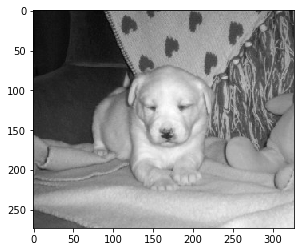

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/home/shannen/Datasets/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to cats or dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [28]:
print(img_array.shape)

(273, 327)


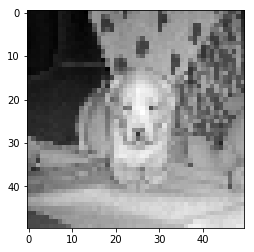

In [29]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [30]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to cats or dogs dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [31]:
print(len(training_data))

24946


In [32]:
import random

random.shuffle(training_data)

In [33]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
1
1
1
1
1
1
0


In [34]:
X = []
y = []

In [35]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [36]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [37]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [38]:
X[1]

array([[[108],
        [112],
        [115],
        ...,
        [113],
        [ 52],
        [ 19]],

       [[113],
        [116],
        [120],
        ...,
        [119],
        [ 14],
        [  5]],

       [[117],
        [120],
        [123],
        ...,
        [ 24],
        [  7],
        [  6]],

       ...,

       [[163],
        [168],
        [179],
        ...,
        [186],
        [183],
        [181]],

       [[165],
        [176],
        [180],
        ...,
        [189],
        [185],
        [181]],

       [[171],
        [172],
        [181],
        ...,
        [181],
        [181],
        [180]]], dtype=uint8)